<a href="https://colab.research.google.com/github/rbondili/Ecommerce_E2E_MLProject/blob/master/05_Running_Multiple_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5) Classification of customers

In this section we try to classify customers to the above clusters using some features 'mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4'. Thus, we can use our models to classify a customer at the first purchase.


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/My Drive/Colab Notebooks/Customer Segmentation/ecommerce-data/'
selected_customers = pd.read_csv(relative_path + 'data_selected_customers.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


We first build a class `Class_Fit` to manage classifier.

In [ ]:
class Class_Fit:
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))
        

Here is the function to plot learning curves, read and understand it.

In [ ]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

##5.1) Prepare train and validation data 
Use `mean`, `categ_0` to `categ_4` as features and `cluster` as class.

In [ ]:
selected_customers.head()

,Unnamed: 0,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,cluster
0,0,12346.0,1,77183.60,77183.60,77183.600000,77183.60,0.000000,0.000000,0.000000,100.000000,0.000000,1
1,1,12347.0,7,224.82,1294.32,615.714286,4310.00,20.805104,12.041531,29.540371,26.375870,11.237123,11
2,2,12348.0,4,227.44,892.80,449.310000,1797.24,0.000000,20.030714,0.000000,41.953217,38.016069,9
3,3,12349.0,1,1757.55,1757.55,1757.550000,1757.55,12.245455,46.021450,10.713778,26.506216,4.513101,8
4,4,12350.0,1,334.40,334.40,334.400000,334.40,27.900718,11.961722,0.000000,48.444976,11.692584,6


In [ ]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

## 5.2) SVM classifier

Here we build an SVM classifier. Use GridSearchCV with logariphmic scale from 0.01 to 100. For Cross-Validation use 5 folds.

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

svc = Class_Fit(clf = svm.LinearSVC, params={'max_iter':100})
svc.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)

In [ ]:
from sklearn import metrics
svc.grid_fit(X = X_train, Y = Y_train)
svc.grid_predict(X_test, Y_test)

Precision: 74.77 % 


In [ ]:
svc.grid.best_estimator_

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

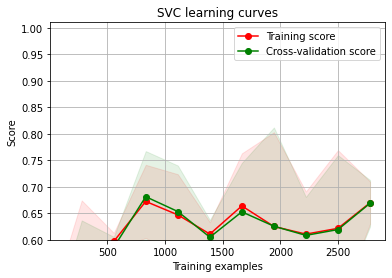

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# plot learning curves
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])



## 5.3) Logistic regression


Precision: 88.36 % 


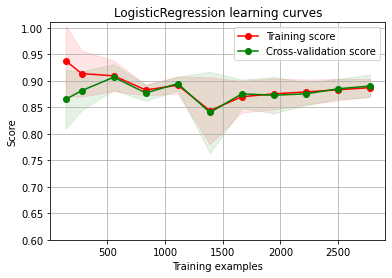

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Class_Fit(clf = LogisticRegression, params={'max_iter':100})
logreg.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)

logreg.grid_fit(X = X_train, Y = Y_train)
logreg.grid_predict(X_test, Y_test)

# plot learning curves
g = plot_learning_curve(logreg.grid.best_estimator_,
                        "LogisticRegression learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])


## 5.4) k-nearest neighbors



Precision: 82.26 % 


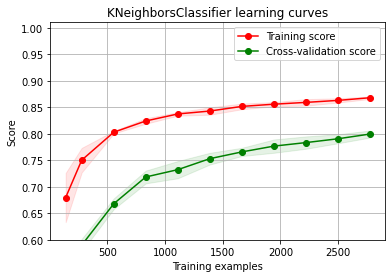

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = Class_Fit(clf = KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors':[5, 10, 15],'algorithm':['auto', 'kd_tree']}], Kfold = 5)

knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

# plot learning curves
g = plot_learning_curve(knn.grid.best_estimator_,
                        "KNeighborsClassifier learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])


## 5.5) Decision tree



Precision: 90.55 % 


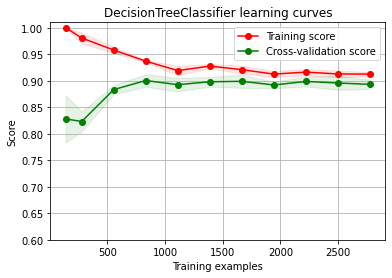

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = Class_Fit(clf = DecisionTreeClassifier)
dtc.grid_search(parameters = [{'criterion': ['gini', 'entropy'],'ccp_alpha':np.logspace(-2,2,20)}], Kfold = 5)

dtc.grid_fit(X = X_train, Y = Y_train)
dtc.grid_predict(X_test, Y_test)

# plot learning curves
g = plot_learning_curve(dtc.grid.best_estimator_,
                        "DecisionTreeClassifier learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])


## 5.6) Random forest


Precision: 91.01 % 


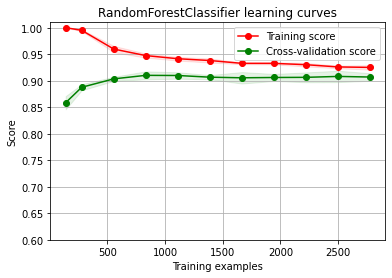

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = Class_Fit(clf = RandomForestClassifier)
rf.grid_search(parameters = [{'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'ccp_alpha':np.logspace(-2,2,20)}], 
               Kfold = 5)

rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

# plot learning curves
g = plot_learning_curve(rf.grid.best_estimator_,
                        "RandomForestClassifier learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])


## 5.7) Adaboost


Precision: 93.89 % 


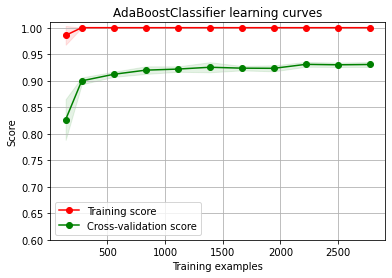

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = Class_Fit(clf=AdaBoostClassifier, params=None)

para_grid = {'base_estimator':[DecisionTreeClassifier(max_depth=1),
                               DecisionTreeClassifier(max_depth=5),
                               DecisionTreeClassifier(max_depth=7),
                               DecisionTreeClassifier(max_depth=9)
                              ],
             'algorithm':['SAMME','SAMME.R'],
             'n_estimators':[200] 
            }
ada.grid_search(parameters=para_grid, Kfold=5)

ada.grid_fit(X_train, Y_train)

ada.grid.best_params_, ada.grid_predict(X_test, Y_test)

# plot learning curves
g = plot_learning_curve(ada.grid.best_estimator_,
                        "AdaBoostClassifier learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])


## 5.8) Gradient boosting classifier


**Task:** Build a gradient boosting model using `Class_Fit`, use grid search to train. Then compute the test precision and plot learning curves.

Precision: 93.89 % 


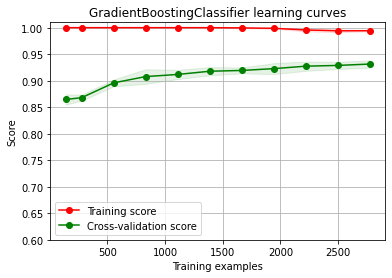

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
gb = Class_Fit(clf=GradientBoostingClassifier, params=None)

para_grid = {
    'n_estimators':[100, 200, 300]
            }
gb.grid_search(parameters=para_grid, Kfold=5)

gb.grid_fit(X_train, Y_train)

gb.grid.best_params_, ada.grid_predict(X_test, Y_test)

# plot learning curves
g = plot_learning_curve(gb.grid.best_estimator_,
                        "GradientBoostingClassifier learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])


## 5.9) XGBoost 

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.

https://xgboost.readthedocs.io/en/latest/

Precision: 94.47 % 


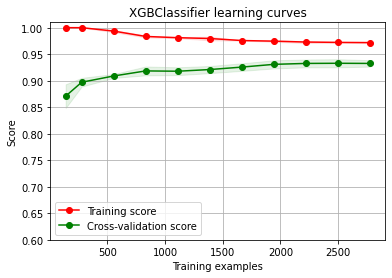

In [ ]:
import xgboost as XGBClassifier

xgb = Class_Fit(clf=XGBClassifier.XGBClassifier, params=None)

para_grid = {
    'objective':['multi:softmax'],
    'n_estimators':[100, 200, 300]
            }
xgb.grid_search(parameters=para_grid, Kfold=5)

xgb.grid_fit(X_train, Y_train)

xgb.grid.best_params_, xgb.grid_predict(X_test, Y_test)

# plot learning curves
g = plot_learning_curve(xgb.grid.best_estimator_,
                        "XGBClassifier learning curves", X_train, Y_train, ylim = [0.6, 1.01],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])


# 5.10) Testing predictions


In [ ]:
models = [(svc, 'Support Vector Machines'),
         (logreg, 'LogisticRegression'),
         (knn, 'KNeighborsClassifier'),
         (dtc, 'DecisionTreeClassifier'),
         (rf, 'RandomForestClassifier'),
         (ada, 'AdaBoostClassifier'),
         (gb, 'GradientBoostingClassifier'),
         (xgb, 'XGBClassifier')]

for model, label in models:
  print(f'Model {label}')
  model.grid_predict(X_test, Y_test)
  print('\n')

Model Support Vector Machines
Precision: 74.77 % 


Model LogisticRegression
Precision: 88.36 % 


Model KNeighborsClassifier
Precision: 82.26 % 


Model DecisionTreeClassifier
Precision: 90.55 % 


Model RandomForestClassifier
Precision: 91.01 % 


Model AdaBoostClassifier
Precision: 93.89 % 


Model GradientBoostingClassifier
Precision: 92.97 % 


Model XGBClassifier
Precision: 94.47 % 




# 6) Summary

As we can see the accurcy was really close in the `RF & GB models` and we can extent this analysis further using neural networks. But I belive `94.47% of accuracy` is a very strong model that can be used for this problem. 